In [7]:
import os
import statistics
import math
import numpy as np
from ultra_parse import parse_csv
from kalman_filter import KalmanFilter

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [8]:
import import_ipynb
from ultra_mt_filtering import plot_data, linearize_cov, kalman_filter, moving_average

In [9]:
a45_into_files = []
a45_from_files = []
a45_into_from_files = []
for log_file in os.listdir("logs/"):
    if log_file.startswith("hall_angle_45_into_hall_"):
        a45_into_files.append(log_file)
    elif log_file.startswith("hall_angle_45_from_hall_"):
        a45_from_files.append(log_file)
    elif log_file.startswith("hall_angle_45_into_from_hall_"):
        a45_into_from_files.append(log_file)
        
def parse_and_merge(log_file, all_data):
    data = parse_csv("logs/" + log_file)
    run_number = log_file[len("hall_angle_45_into_hall_"):-len(".csv")]
    for name, values in data.items():
        all_data[f"run_{run_number}"] = values
    return all_data

data_empty = parse_csv("logs/hall_angle_45_empty.csv")

data_into = {}
for into_file in a45_into_files:
    parse_and_merge(into_file, data_into)

data_from = {}
for from_file in a45_from_files:
    parse_and_merge(from_file, data_from)

data_into_from = {}
for if_file in a45_into_from_files:
    parse_and_merge(if_file, data_into_from)

data_ultra_long_empty = parse_csv("ultra_long_empty.csv")

Could not parse data line '1600275128.9727437,'
Could not parse data line '1600275153.0327346,'
Could not parse data line '1600275160.2526813,'
Could not parse data line '1600275243.2718127,'
Could not parse data line '1600275258.910566,'
Could not parse data line '1600275339.5224042,'
Could not parse data line '1600274534.633181,'
Could not parse data line '1600274653.740841,'
Could not parse data line '1600274580.3526177,'
Could not parse data line '1602017329.4083583,'
Could not parse data line '1602017352.268289,'
Could not parse data line '1602017365.1009774,'
Could not parse data line '1602018078.5851996,'
Could not parse data line '1602018394.2261243,'
Could not parse data line '1602018459.19977,'
Could not parse data line '1602018506.128013,'
Could not parse data line '1602018590.349359,'
Could not parse data line '1602018695.0283625,'
Could not parse data line '1602018927.2385292,'
Could not parse data line '1602019007.450863,'
Could not parse data line '1602019349.5672977,'
C

Could not parse data line '1602052386.0183408,'
Could not parse data line '1602052437.7579734,'
Could not parse data line '1602052446.1718242,'
Could not parse data line '1602052626.649554,'
Could not parse data line '1602052678.3876262,'
Could not parse data line '1602052860.0602977,'
Could not parse data line '1602053000.8269236,'
Could not parse data line '1602053028.499438,'
Could not parse data line '1602053079.83539,'
Could not parse data line '1602053151.2274559,'
Could not parse data line '1602053469.6645799,'
Could not parse data line '1602053583.9608502,'
Could not parse data line '1602053720.3174186,'
Could not parse data line '1602053932.884403,'
Could not parse data line '1602054148.6477675,'
Could not parse data line '1602054176.3183196,'
Could not parse data line '1602054189.5534217,'
Could not parse data line '1602054360.0204868,'
Could not parse data line '1602054431.0089295,'
Could not parse data line '1602054435.0193737,'
Could not parse data line '1602054859.753867,

In [10]:
def threshold_feature(data, threshold):
    feature_intervals = []
    start_feature = None
    end_feature = None
    for ts, dist in data:
        if dist < threshold:
            if start_feature is None:   # new interval
                start_feature = ts
                end_feature = ts
            else:                       # continue/expand interval
                end_feature = ts
        elif start_feature is not None:
            feature_intervals.append((start_feature, end_feature))
            start_feature = None
            end_feature = None
    if start_feature is not None:
        feature_intervals.append((start_feature, end_feature))
    return feature_intervals

At 10000/299900 - 3.3% done
At 20000/299900 - 6.7% done
At 30000/299900 - 10.0% done
At 40000/299900 - 13.3% done
At 50000/299900 - 16.7% done
At 60000/299900 - 20.0% done
At 70000/299900 - 23.3% done
At 80000/299900 - 26.7% done
At 90000/299900 - 30.0% done
At 100000/299900 - 33.3% done
At 110000/299900 - 36.7% done
At 120000/299900 - 40.0% done
At 130000/299900 - 43.3% done
At 140000/299900 - 46.7% done
At 150000/299900 - 50.0% done
At 160000/299900 - 53.4% done
At 170000/299900 - 56.7% done
At 180000/299900 - 60.0% done
At 190000/299900 - 63.4% done
At 200000/299900 - 66.7% done
At 210000/299900 - 70.0% done
At 220000/299900 - 73.4% done
At 230000/299900 - 76.7% done
At 240000/299900 - 80.0% done
At 250000/299900 - 83.4% done
At 260000/299900 - 86.7% done
At 270000/299900 - 90.0% done
At 280000/299900 - 93.4% done
At 290000/299900 - 96.7% done


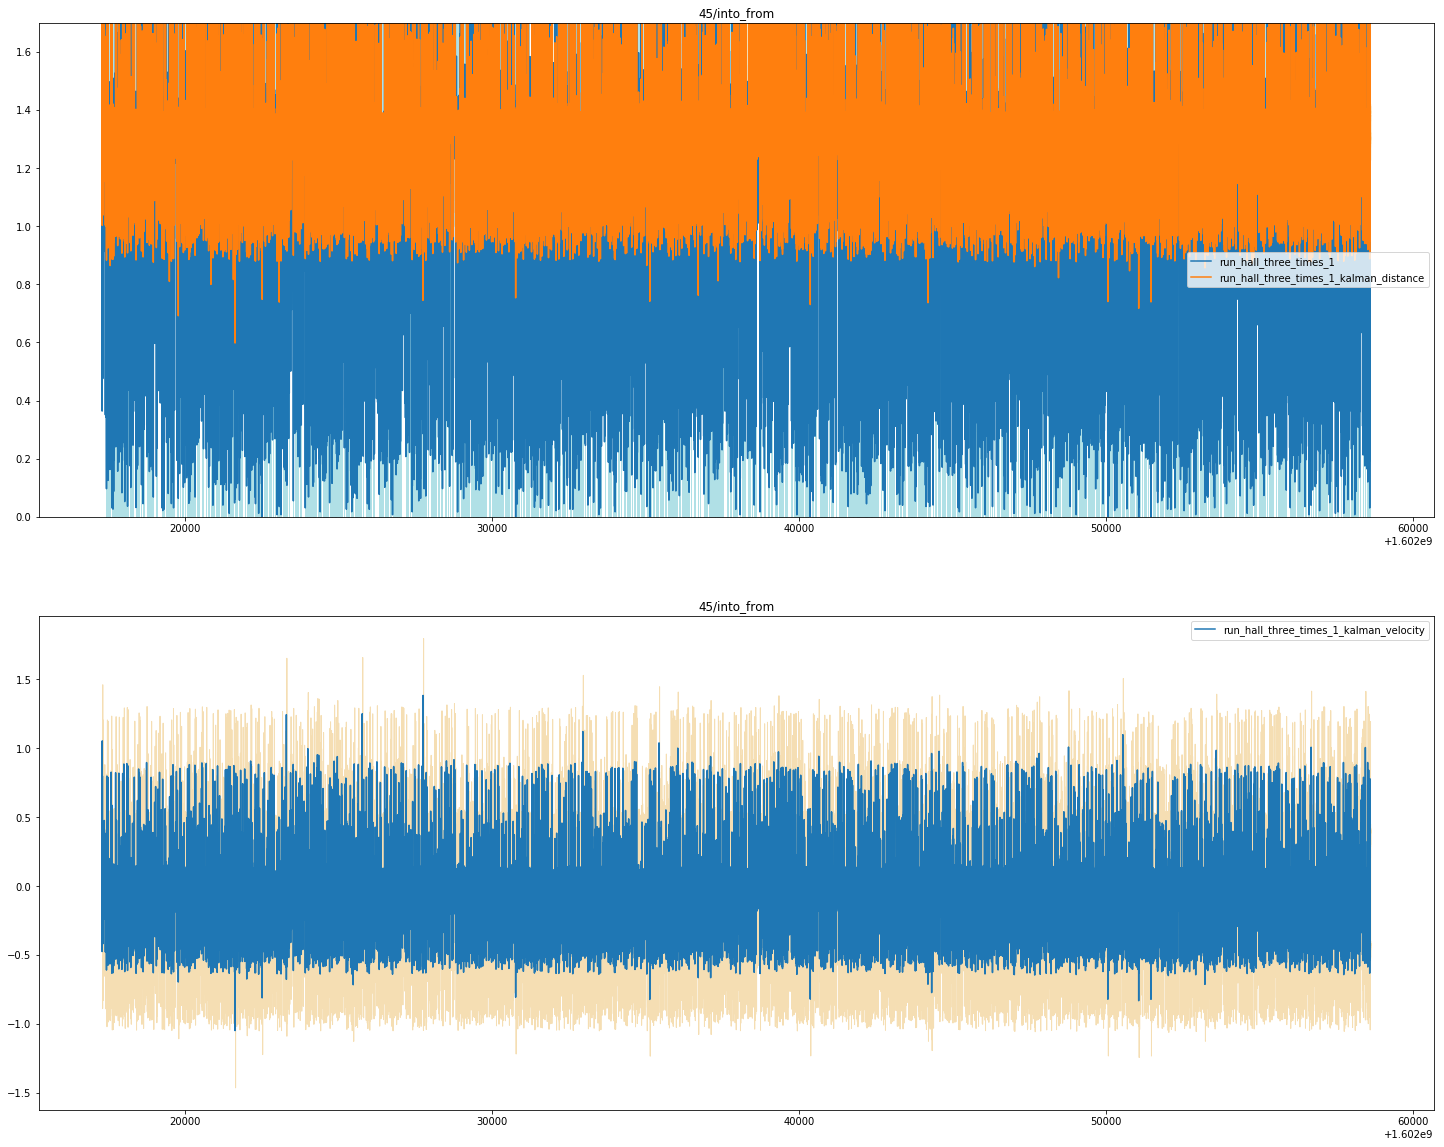

In [11]:
run = "run_1"
run = "run_hall_three_times_1"
cur_data = data_into_from[run]
cur_data = data_ultra_long_empty["1"]
data_values = cur_data
#mavg_data = moving_average(data_values)
kalman_dist, kalman_vel, kalman_cov, predict_dist, predict_vel, predict_cov = kalman_filter(data_values)
lin_covs = linearize_cov(kalman_cov)
predict_lin_covs = linearize_cov(predict_cov)
kalman_dist_cov00 = [(ts, c[0, 0]+1) for ts, c in kalman_cov]
kalman_dist_cov = [(ts, cov[0]) for ts, cov in lin_covs]
kalman_vel_cov11 = [(ts, c[1,1]+1) for ts, c in kalman_cov]
kalman_vel_cov = [(ts, cov[1]) for ts, cov in lin_covs]
kalman_dist_errs = [(ts, d, kalman_dist_cov[i][1]) for i, (ts, d) in enumerate(kalman_dist)]
kalman_vel_errs = [(ts, v, kalman_vel_cov[i][1]) for i, (ts, v) in enumerate(kalman_vel)]
predict_dist_cov = [(ts, cov[0]) for ts, cov in predict_lin_covs]
predict_vel_cov = [(ts, cov[1]) for ts, cov in predict_lin_covs]
predict_dist_errs = [(ts, d, predict_dist_cov[i][1]) for i, (ts, d) in enumerate(predict_dist)]
predict_vel_errs = [(ts, v, predict_vel_cov[i][1]) for i, (ts, v) in enumerate(predict_vel)]

current_run = {run : cur_data,
               #run + "_moving_average" : mavg_data,
               run + "_kalman_distance" : kalman_dist_errs,
               #run + "kalman_velocity" : kalman_vel,
              }
current_run_vels = {#run : data_from[run],
               #run + "_moving_average" : mavg_data,
               #run + "_kalman_distance" : kalman_dist,
               run + "_kalman_velocity" : kalman_vel_errs,
              }

predict_run = {#run : data_from[run],
               run + "_predict_distance" : predict_dist_errs,
              }
predict_run_vels = {#run : data_from[run],
               run + "_predict_velocity" : predict_vel_errs,
              }
current_run_covs = {#run : data_from[run],
               #run + "_moving_average" : mavg_data,
               run + "_kalman_dist_cov00" : kalman_dist_cov00,
               run + "_kalman_dist_cov" : kalman_dist_cov,
               run + "_kalman_vel_cov11" : kalman_vel_cov11,
               run + "_kalman_vel_cov" : kalman_vel_cov,
              }


fig, axes = plt.subplots(2,1, figsize=(25,20))
ylim = [0.0, 1.7]
axes[0].set_ylim(ylim)
#axes[2].set_ylim(ylim)

walk_through = threshold_feature(kalman_dist, 1.0)
#starts = [start for start,end in walk_through]
#ends = [end for start,end in walk_through]
#ys = [(ylim[0],ylim[1]) for _ in starts]
#print(starts)
#print(ends)

plot_data(axes[0], current_run, start_at_time_zero=False, label_prefix="45/into_from")
plot_data(axes[1], current_run_vels, start_at_time_zero=False, label_prefix="45/into_from")
for start,end in walk_through:
    axes[0].fill_betweenx(ylim, start, end, label="walk_through_1m", color="powderblue")
#plot_data(axes[2], predict_run, start_at_time_zero=False, label_prefix="45/from")
#plot_data(axes[3], predict_run_vels, start_at_time_zero=False, label_prefix="45/from")
#plot_data(axes[4], current_run_covs, start_at_time_zero=False, label_prefix="45/from")